# OWA Aggregation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MaxAbsScaler
import geopandas as gpd

### so that you dont have warnings prompt
from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
df=pd.read_csv(r"C:\Users\Praujjawal\Desktop\BTP I Materials\Actual Data\2019_FINAL_DATA.csv")
shp= gpd.read_file(r"C:\Users\Praujjawal\Downloads\Shape Files\India States\Indian_states.shx")

In [3]:
df

,States/UTs,State/UT-wise Total Number of Persons Injured in Road Accidents during - 2019,Share of States/UTs in Total Number of Persons Injured in Road Accidents - 2019,Total Number of Persons Injured in Road Accidents Per Lakh Population - 2019,"Total Number of Persons Injured in Road Accidents per 10,000 Vehicles - 2019",State/UT-wise Total Number of Persons Killed in Road Accidents during - 2019,Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2019,Total Number of Persons Killed in Road Accidents Per Lakh Population - 2019,"Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2019",People killed with Permanent DL in 2019,...,Number of people killed in 2019 by pedestrian accident impact,Number of people killed in 2019 by bicycle accident impact,Number of people killed in 2019 by motorised 2 wheeler accident impact,Number of people killed in 2019 by autorickshaw accident impact,Number of people killed in 2019 by LMV accident impact,Number of people killed in 2019 by Trucks/ Lorries accident impact,Number of people killed in 2019 by Buses accident impact,Number of people killed in 2019 by other vehicles accident impact,Number of people killed in 2019 due to absence of helmet,Number of people killed in 2019 due to absence of seat belt
0,Andhra Pradesh,24619.0,5.5,27.3,20.5,7984.0,5.3,8.8,6.7,15303.0,...,1723.0,94.0,3352.0,572.0,703.0,629.0,213.0,698.0,2636.0,711.0
1,Arunachal Pradesh,309.0,0.1,22.8,13.4,127.0,0.1,9.4,5.5,63.0,...,8.0,0.0,26.0,6.0,27.0,9.0,4.0,47.0,25.0,18.0
2,Assam,7473.0,1.7,22.3,19.0,3208.0,2.1,9.6,8.1,7037.0,...,718.0,106.0,1031.0,127.0,528.0,241.0,153.0,304.0,440.0,253.0
3,Bihar,7206.0,1.6,6.7,8.4,7205.0,4.8,6.7,8.4,8373.0,...,1259.0,419.0,3135.0,440.0,932.0,243.0,131.0,646.0,525.0,76.0
4,Chhattisgarh,13090.0,2.9,48.9,20.5,5003.0,3.3,18.7,7.8,8395.0,...,578.0,173.0,2894.0,51.0,413.0,274.0,71.0,549.0,2618.0,701.0
5,Goa,1448.0,0.3,68.4,10.3,297.0,0.2,14.0,2.1,3337.0,...,50.0,2.0,186.0,1.0,16.0,4.0,8.0,30.0,147.0,24.0
6,Gujarat,16258.0,3.6,25.1,6.5,7390.0,4.9,11.4,2.9,11936.0,...,1291.0,84.0,2755.0,375.0,1381.0,817.0,200.0,487.0,2013.0,1447.0
7,Haryana,9362.0,2.1,32.7,10.9,5057.0,3.3,17.7,5.9,3922.0,...,1673.0,103.0,1614.0,99.0,589.0,320.0,135.0,524.0,554.0,478.0
8,Himachal Pradesh,4904.0,1.1,67.6,30.0,1146.0,0.8,15.8,7.0,1807.0,...,192.0,5.0,288.0,2.0,469.0,59.0,81.0,50.0,239.0,634.0
9,Jammu & Kashmir,7532.0,1.7,58.9,40.6,996.0,0.7,7.8,5.4,4863.0,...,88.0,7.0,171.0,14.0,246.0,138.0,108.0,224.0,19.0,35.0


In [4]:
#Dropping the columns "share of states/UTs" as it has corr=1 with respectively previous columns

dropped= df.columns[[2,6]]
df= df.iloc[:, ~df.columns.isin(dropped)]

In [5]:
sd= df.select_dtypes(exclude=['object'])
sd.head()

,State/UT-wise Total Number of Persons Injured in Road Accidents during - 2019,Total Number of Persons Injured in Road Accidents Per Lakh Population - 2019,"Total Number of Persons Injured in Road Accidents per 10,000 Vehicles - 2019",State/UT-wise Total Number of Persons Killed in Road Accidents during - 2019,Total Number of Persons Killed in Road Accidents Per Lakh Population - 2019,"Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2019",People killed with Permanent DL in 2019,People killed with LL in 2019,People killed without any license in 2019,Number of people killed in 2019 by pedestrian accident impact,Number of people killed in 2019 by bicycle accident impact,Number of people killed in 2019 by motorised 2 wheeler accident impact,Number of people killed in 2019 by autorickshaw accident impact,Number of people killed in 2019 by LMV accident impact,Number of people killed in 2019 by Trucks/ Lorries accident impact,Number of people killed in 2019 by Buses accident impact,Number of people killed in 2019 by other vehicles accident impact,Number of people killed in 2019 due to absence of helmet,Number of people killed in 2019 due to absence of seat belt
0,24619.0,27.3,20.5,7984.0,8.8,6.7,15303.0,1262.0,2576.0,1723.0,94.0,3352.0,572.0,703.0,629.0,213.0,698.0,2636.0,711.0
1,309.0,22.8,13.4,127.0,9.4,5.5,63.0,50.0,52.0,8.0,0.0,26.0,6.0,27.0,9.0,4.0,47.0,25.0,18.0
2,7473.0,22.3,19.0,3208.0,9.6,8.1,7037.0,640.0,369.0,718.0,106.0,1031.0,127.0,528.0,241.0,153.0,304.0,440.0,253.0
3,7206.0,6.7,8.4,7205.0,6.7,8.4,8373.0,823.0,130.0,1259.0,419.0,3135.0,440.0,932.0,243.0,131.0,646.0,525.0,76.0
4,13090.0,48.9,20.5,5003.0,18.7,7.8,8395.0,857.0,1763.0,578.0,173.0,2894.0,51.0,413.0,274.0,71.0,549.0,2618.0,701.0


In [6]:
col= sd.columns

In [7]:
sclr= MaxAbsScaler()
sd= sclr.fit_transform(sd)


In [8]:
states= df.iloc[:,0]

In [9]:
dff =pd.DataFrame(sd,columns=col)

In [10]:
dff.head()

,State/UT-wise Total Number of Persons Injured in Road Accidents during - 2019,Total Number of Persons Injured in Road Accidents Per Lakh Population - 2019,"Total Number of Persons Injured in Road Accidents per 10,000 Vehicles - 2019",State/UT-wise Total Number of Persons Killed in Road Accidents during - 2019,Total Number of Persons Killed in Road Accidents Per Lakh Population - 2019,"Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2019",People killed with Permanent DL in 2019,People killed with LL in 2019,People killed without any license in 2019,Number of people killed in 2019 by pedestrian accident impact,Number of people killed in 2019 by bicycle accident impact,Number of people killed in 2019 by motorised 2 wheeler accident impact,Number of people killed in 2019 by autorickshaw accident impact,Number of people killed in 2019 by LMV accident impact,Number of people killed in 2019 by Trucks/ Lorries accident impact,Number of people killed in 2019 by Buses accident impact,Number of people killed in 2019 by other vehicles accident impact,Number of people killed in 2019 due to absence of helmet,Number of people killed in 2019 due to absence of seat belt
0,0.366698,0.214792,0.462754,0.352417,0.470588,0.656863,0.357321,0.190003,0.271759,0.587453,0.071374,0.483624,0.371912,0.188522,0.287215,0.151818,0.184901,0.373954,0.145816
1,0.004603,0.179386,0.302483,0.005606,0.502674,0.539216,0.001471,0.007528,0.005486,0.002728,0.000000,0.003751,0.003901,0.007241,0.004110,0.002851,0.012450,0.003547,0.003692
2,0.111310,0.175452,0.428894,0.141602,0.513369,0.794118,0.164312,0.096357,0.038928,0.244801,0.080486,0.148752,0.082575,0.141593,0.110046,0.109052,0.080530,0.062420,0.051887
3,0.107333,0.052714,0.189616,0.318031,0.358289,0.823529,0.195508,0.123908,0.013715,0.429253,0.318147,0.452316,0.286086,0.249933,0.110959,0.093371,0.171126,0.074479,0.015587
4,0.194974,0.384736,0.462754,0.220834,1.000000,0.764706,0.196021,0.129027,0.185990,0.197068,0.131359,0.417544,0.033160,0.110754,0.125114,0.050606,0.145430,0.371400,0.143765


In [11]:
DF = pd.merge(states,dff, left_index=True, right_index=True)

In [12]:
DF

,States/UTs,State/UT-wise Total Number of Persons Injured in Road Accidents during - 2019,Total Number of Persons Injured in Road Accidents Per Lakh Population - 2019,"Total Number of Persons Injured in Road Accidents per 10,000 Vehicles - 2019",State/UT-wise Total Number of Persons Killed in Road Accidents during - 2019,Total Number of Persons Killed in Road Accidents Per Lakh Population - 2019,"Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2019",People killed with Permanent DL in 2019,People killed with LL in 2019,People killed without any license in 2019,Number of people killed in 2019 by pedestrian accident impact,Number of people killed in 2019 by bicycle accident impact,Number of people killed in 2019 by motorised 2 wheeler accident impact,Number of people killed in 2019 by autorickshaw accident impact,Number of people killed in 2019 by LMV accident impact,Number of people killed in 2019 by Trucks/ Lorries accident impact,Number of people killed in 2019 by Buses accident impact,Number of people killed in 2019 by other vehicles accident impact,Number of people killed in 2019 due to absence of helmet,Number of people killed in 2019 due to absence of seat belt
0,Andhra Pradesh,0.366698,0.214792,0.462754,0.352417,0.470588,0.656863,0.357321,0.190003,0.271759,0.587453,0.071374,0.483624,0.371912,0.188522,0.287215,0.151818,0.184901,0.373954,0.145816
1,Arunachal Pradesh,0.004603,0.179386,0.302483,0.005606,0.502674,0.539216,0.001471,0.007528,0.005486,0.002728,0.000000,0.003751,0.003901,0.007241,0.004110,0.002851,0.012450,0.003547,0.003692
2,Assam,0.111310,0.175452,0.428894,0.141602,0.513369,0.794118,0.164312,0.096357,0.038928,0.244801,0.080486,0.148752,0.082575,0.141593,0.110046,0.109052,0.080530,0.062420,0.051887
3,Bihar,0.107333,0.052714,0.189616,0.318031,0.358289,0.823529,0.195508,0.123908,0.013715,0.429253,0.318147,0.452316,0.286086,0.249933,0.110959,0.093371,0.171126,0.074479,0.015587
4,Chhattisgarh,0.194974,0.384736,0.462754,0.220834,1.000000,0.764706,0.196021,0.129027,0.185990,0.197068,0.131359,0.417544,0.033160,0.110754,0.125114,0.050606,0.145430,0.371400,0.143765
5,Goa,0.021568,0.538159,0.232506,0.013110,0.748663,0.205882,0.077918,0.000602,0.007807,0.017047,0.001519,0.026836,0.000650,0.004291,0.001826,0.005702,0.007947,0.020854,0.004922
6,Gujarat,0.242162,0.197482,0.146727,0.326197,0.609626,0.284314,0.278703,0.161096,0.131343,0.440164,0.063781,0.397490,0.243823,0.370341,0.373059,0.142552,0.129007,0.285572,0.296760
7,Haryana,0.139446,0.257278,0.246050,0.223218,0.946524,0.578431,0.091578,0.034628,0.034497,0.570406,0.078208,0.232867,0.064369,0.157951,0.146119,0.096222,0.138808,0.078593,0.098031
8,Himachal Pradesh,0.073045,0.531865,0.677201,0.050585,0.844920,0.686275,0.042193,0.003011,0.082709,0.065462,0.003797,0.041552,0.001300,0.125771,0.026941,0.057733,0.013245,0.033906,0.130025
9,Jammu & Kashmir,0.112189,0.463415,0.916479,0.043964,0.417112,0.529412,0.113550,0.005721,0.001899,0.030003,0.005315,0.024672,0.009103,0.065969,0.063014,0.076978,0.059338,0.002695,0.007178


In [13]:
min(DF.min(axis=1))

0.0

In [14]:
DF.describe()

,State/UT-wise Total Number of Persons Injured in Road Accidents during - 2019,Total Number of Persons Injured in Road Accidents Per Lakh Population - 2019,"Total Number of Persons Injured in Road Accidents per 10,000 Vehicles - 2019",State/UT-wise Total Number of Persons Killed in Road Accidents during - 2019,Total Number of Persons Killed in Road Accidents Per Lakh Population - 2019,"Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2019",People killed with Permanent DL in 2019,People killed with LL in 2019,People killed without any license in 2019,Number of people killed in 2019 by pedestrian accident impact,Number of people killed in 2019 by bicycle accident impact,Number of people killed in 2019 by motorised 2 wheeler accident impact,Number of people killed in 2019 by autorickshaw accident impact,Number of people killed in 2019 by LMV accident impact,Number of people killed in 2019 by Trucks/ Lorries accident impact,Number of people killed in 2019 by Buses accident impact,Number of people killed in 2019 by other vehicles accident impact,Number of people killed in 2019 due to absence of helmet,Number of people killed in 2019 due to absence of seat belt
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,0.186750,0.272642,0.344495,0.185283,0.523767,0.459423,0.210014,0.092881,0.129989,0.244895,0.088501,0.224980,0.120196,0.178034,0.171639,0.129267,0.105276,0.176014,0.118978
std,0.258910,0.228769,0.258048,0.225059,0.244001,0.252305,0.283031,0.178261,0.226265,0.284892,0.175121,0.268629,0.192018,0.251026,0.253421,0.223386,0.179341,0.245815,0.200305
min,0.000015,0.009441,0.013544,0.000000,0.000000,0.000000,0.000023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.004703,0.103068,0.173815,0.006268,0.336898,0.276961,0.006573,0.002635,0.004589,0.009802,0.002088,0.005483,0.001788,0.003955,0.002626,0.002673,0.002583,0.003476,0.004614
50%,0.074892,0.189221,0.269752,0.103090,0.521390,0.475490,0.087025,0.028229,0.035500,0.127855,0.037585,0.109652,0.032510,0.083400,0.045662,0.041696,0.045563,0.035750,0.024918
75%,0.263539,0.377655,0.462754,0.310053,0.711230,0.634804,0.298357,0.130119,0.134376,0.431981,0.094723,0.402503,0.204974,0.208099,0.273858,0.148610,0.141258,0.309441,0.151302
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


CUSTOM OWA RULES

If a state has 10 or more indicators (considering total 19 indicators) with poor performance then it has an average index score less than 0.25
The indicators having bad values(<25%ile) will be considered as having indicator value = 0
The indiactors having values between (25%ile and 75th %ile) have indicactor value = 0.5

If a state has 9 indicators (considering total 19 indicators) with good performance and 1 with average 
performance then it has lower medium index score(0.25- 0.5).
The indicators having good values(>75%ile) will be considered as having indicator value = 1


Equations= 

(9/19)^A <= 0.25

=>   a>= 1.85

0.25 <= 0.5(10/19)^A + 0.5(9/19)^A <= 0.5

=>   1.85<= a <= 2.00


<b>SOLVE</b>  Leaves us with A in range[1.85 - 2.00]

So, we take A= 1.9 for OWA 

So, OWA Weights
W1= (1/9)^1.9

W2= (2/19)^1.9- (1/19)^1.9

W3= (3/19)^1.9 - (2/19)^1.9

.........

W19= 1 - (18/19)^1.9,

So, <br>
W1= 0.0037185 <br>
W2= 0.0101594 <br>
W3= 0.0161067 <br>
W4= 0.0218097 <br>
W5= 0.0273484 <br>
W6= 0.0327638 <br>
W7= 0.0380807 <br>
W8= 0.043316 <br>
W9= 0.0484815 <br>
W10= 0.0535864 <br>
W11= 0.0586378 <br>
W12= 0.0636411 <br>
W13= 0.068601 <br>
W14= 0.0735213 <br>
W15= 0.0784053 <br>
W16= 0.0832556 <br>
W17= 0.0880747 <br>
W18= 0.0928647 <br>
W19= 0.0976274


In [15]:
OWA_weights= np.array([[0.0976274], [0.0928647], [0.0880747], [0.0832556], [0.0784053], [0.0735213], [0.068601], [0.0636411],
                       [0.0586378], [0.0535864], [0.0484815], [0.043316], [0.0380807], [0.0327638], [0.0273484], [0.0218097],
                       [0.0161067], [0.0101594], [0.0037185]]) 

In [16]:
OWA_weights

array([[0.0976274],
       [0.0928647],
       [0.0880747],
       [0.0832556],
       [0.0784053],
       [0.0735213],
       [0.068601 ],
       [0.0636411],
       [0.0586378],
       [0.0535864],
       [0.0484815],
       [0.043316 ],
       [0.0380807],
       [0.0327638],
       [0.0273484],
       [0.0218097],
       [0.0161067],
       [0.0101594],
       [0.0037185]])

In [17]:
df2019_OWA= DF.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].apply(lambda x: sorted(x.values), axis=1)


In [18]:
df2019_OWA

0     [0.07137433561123765, 0.14581624282198524, 0.1...
1     [0.0, 0.0014710346276881406, 0.002727582679849...
2     [0.03892815697858424, 0.05188679245283019, 0.0...
3     [0.013714526848823716, 0.015586546349466776, 0...
4     [0.03315994798439532, 0.05060584461867427, 0.1...
5     [0.0006022282445046673, 0.0006501950585175553,...
6     [0.06378132118451026, 0.12900662251655629, 0.1...
7     [0.03449730984281042, 0.03462812405901837, 0.0...
8     [0.0013003901170351106, 0.0030111412225233363,...
9     [0.0018989344867602067, 0.0026954177897574125,...
10    [0.03334345156093119, 0.05686879068174032, 0.0...
11    [0.03644646924829157, 0.16776045939294504, 0.2...
12    [0.009183980728696176, 0.01403973509933775, 0....
13    [0.09187547456340167, 0.3036410923276983, 0.32...
14    [0.11446355100749024, 0.13350993377483444, 0.1...
15    [0.0015894039735099338, 0.0021382751247327157,...
16    [0.0, 0.0017313518972731207, 0.003262874166548...
17    [0.0, 0.0, 0.0, 0.0006501950585175553, 0.0

In [19]:
rank_2019=np.zeros((36, 1))


In [20]:
# Aggregation using OWA vector for all years
for i in range(len(df2019_OWA)):
 
    for j in range(len(OWA_weights[0])):
 
        for k in range(len(OWA_weights)):
            rank_2019[i][j] += df2019_OWA[i][k] * OWA_weights[k][j]
            


In [22]:
rank_2019= rank_2019.flatten()
rank_2019 = pd.DataFrame(rank_2019, columns = ['Index Danger Score- 2019'])

rank_2019 = pd.merge(states,rank_2019, left_index=True, right_index=True)

In [23]:
rank_2019.sort_values(by="Index Danger Score- 2019")

,States/UTs,Index Danger Score- 2019
34,Lakshadweep,0.000147
18,Nagaland,0.004968
17,Mizoram,0.005674
30,Chandigarh,0.007008
29,Andaman & Nicobar Islands,0.010480
32,Daman & Diu,0.011924
31,Dadra & Nagar Haveli,0.014021
16,Meghalaya,0.014120
1,Arunachal Pradesh,0.019425
25,Tripura,0.021396


In [24]:
rank_2019.loc[rank_2019["States/UTs"]=="Dadra & Nagar Haveli","States/UTs"]="Dadara & Nagar Havelli"
rank_2019.loc[rank_2019["States/UTs"]=="Arunachal Pradesh","States/UTs"]="Arunanchal Pradesh"
rank_2019.loc[rank_2019["States/UTs"]=="Andaman & Nicobar Islands","States/UTs"]="Andaman & Nicobar Island"
rank_2019.loc[rank_2019["States/UTs"]=="Delhi","States/UTs"]="NCT of Delhi"

In [25]:
merged_OWA = shp.set_index('st_nm').join(rank_2019.set_index('States/UTs'))

In [26]:
merged_OWA

,geometry,Index Danger Score- 2019
st_nm,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",0.010480
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",0.019425
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",0.108431
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",0.137240
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",0.007008
Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",0.165541
Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650...",0.014021
Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",0.011924
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",0.025207


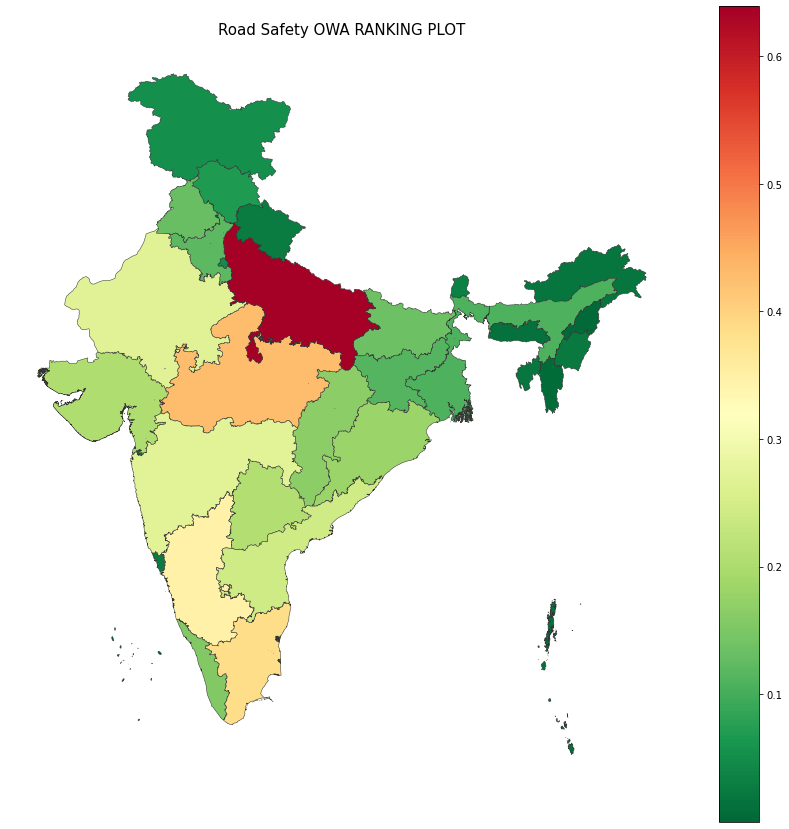

In [27]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.axis('off')
ax.set_title('Road Safety OWA RANKING PLOT',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged_OWA.plot(column='Index Danger Score- 2019', cmap='RdYlGn_r', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
plt.savefig(r"C:\Users\Praujjawal\Desktop\BTP I Materials\Actual Data\OWA_RANKING_PLOT.png", facecolor="w")